# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
      # Make the API request
        response = requests.get(city_url)
        
        # Check if the response status code is 200 (OK)
        if response.status_code == 200:
            # Parse the JSON and retrieve data
            city_weather = response.json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # Parse out the required weather data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ancud
Processing Record 2 of Set 1 | gueltat zemmour
Processing Record 3 of Set 1 | wailua homesteads
Processing Record 4 of Set 1 | natal
Processing Record 5 of Set 1 | abepura
Processing Record 6 of Set 1 | hawaiian paradise park
Processing Record 7 of Set 1 | laojunmiao
Processing Record 8 of Set 1 | praia da vitoria
Processing Record 9 of Set 1 | santa ana
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | taiohae
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | zelenogorsk
Processing Record 15 of Set 1 | hamilton
Processing Record 16 of Set 1 | mount pearl
Processing Record 17 of Set 1 | najaf
Processing Record 18 of Set 1 | stanley
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set 1 | keflavik
P

Processing Record 43 of Set 4 | prado
Processing Record 44 of Set 4 | olonkinbyen
Processing Record 45 of Set 4 | meadow lakes
Processing Record 46 of Set 4 | mount isa
Processing Record 47 of Set 4 | yangor
Processing Record 48 of Set 4 | ust-nera
Processing Record 49 of Set 4 | riachao
Processing Record 0 of Set 5 | kulhudhuffushi
Processing Record 1 of Set 5 | azemmour
Processing Record 2 of Set 5 | moyynkum
Processing Record 3 of Set 5 | kataragama
Processing Record 4 of Set 5 | port-vila
Processing Record 5 of Set 5 | aasiaat
Processing Record 6 of Set 5 | alta
Processing Record 7 of Set 5 | minggang
Processing Record 8 of Set 5 | bardaskan
Processing Record 9 of Set 5 | iskateley
Processing Record 10 of Set 5 | beledweyne
Processing Record 11 of Set 5 | taco pozo
Processing Record 12 of Set 5 | fuvahmulah
Processing Record 13 of Set 5 | virton
Processing Record 14 of Set 5 | severo-yeniseyskiy
Processing Record 15 of Set 5 | miramichi
Processing Record 16 of Set 5 | tofol
Process

Processing Record 42 of Set 8 | fort saskatchewan
Processing Record 43 of Set 8 | solleftea
Processing Record 44 of Set 8 | saint-cyprien-plage
Processing Record 45 of Set 8 | sol'-iletsk
Processing Record 46 of Set 8 | floro
Processing Record 47 of Set 8 | mirriah
Processing Record 48 of Set 8 | longboat key
Processing Record 49 of Set 8 | outjo
Processing Record 0 of Set 9 | wynyard
Processing Record 1 of Set 9 | roccella ionica
Processing Record 2 of Set 9 | puerto baquerizo moreno
Processing Record 3 of Set 9 | les anglais
Processing Record 4 of Set 9 | aswan
Processing Record 5 of Set 9 | deqen
Processing Record 6 of Set 9 | pangoa
Processing Record 7 of Set 9 | yamada
Processing Record 8 of Set 9 | piti village
Processing Record 9 of Set 9 | nadym
Processing Record 10 of Set 9 | pacific grove
Processing Record 11 of Set 9 | dali
Processing Record 12 of Set 9 | irbit
Processing Record 13 of Set 9 | quang ngai
Processing Record 14 of Set 9 | timaru
Processing Record 15 of Set 9 | a

Processing Record 37 of Set 12 | sompeta
Processing Record 38 of Set 12 | uturoa
Processing Record 39 of Set 12 | djambala
Processing Record 40 of Set 12 | necochea
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ancud,-41.8697,-73.8203,282.51,90,100,7.98,CL,1699890579
1,gueltat zemmour,-41.8697,-73.8203,282.51,90,100,7.98,CL,1699890579
2,wailua homesteads,22.0669,-159.3780,297.59,77,40,7.72,US,1699890579
3,natal,-5.7950,-35.2094,304.51,62,40,7.72,BR,1699890579
4,abepura,-2.6333,140.5833,299.60,83,20,2.57,ID,1699890580


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

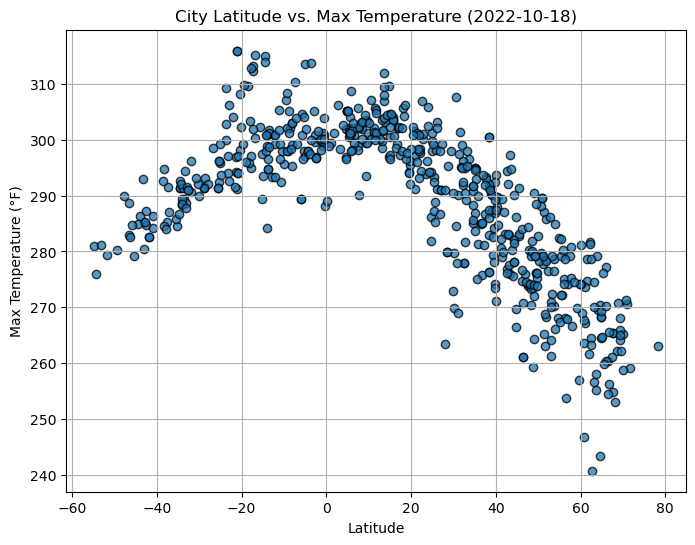

In [7]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

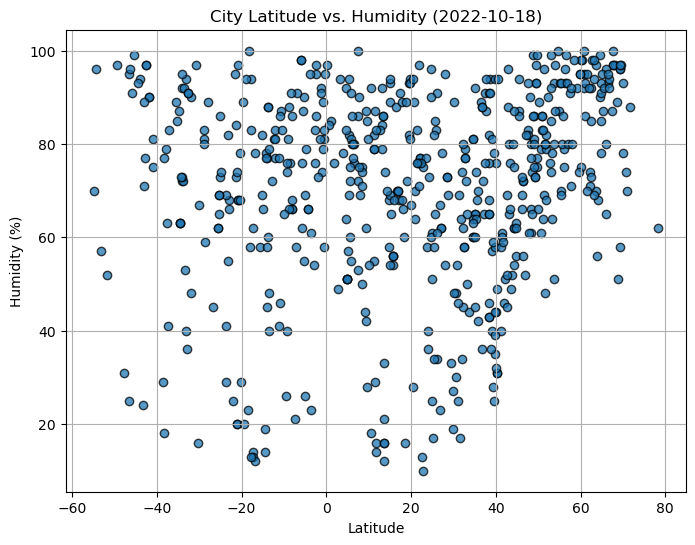

In [8]:
# Build scatter plot for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

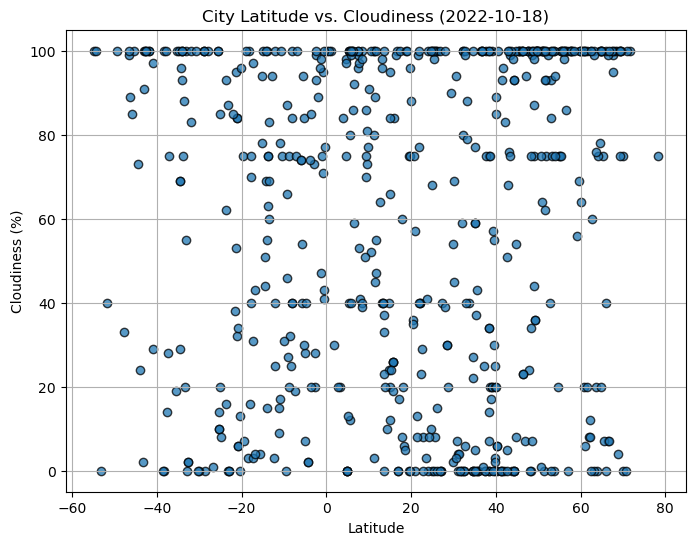

In [9]:
# Build scatter plot for latitude vs. cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
 
#Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

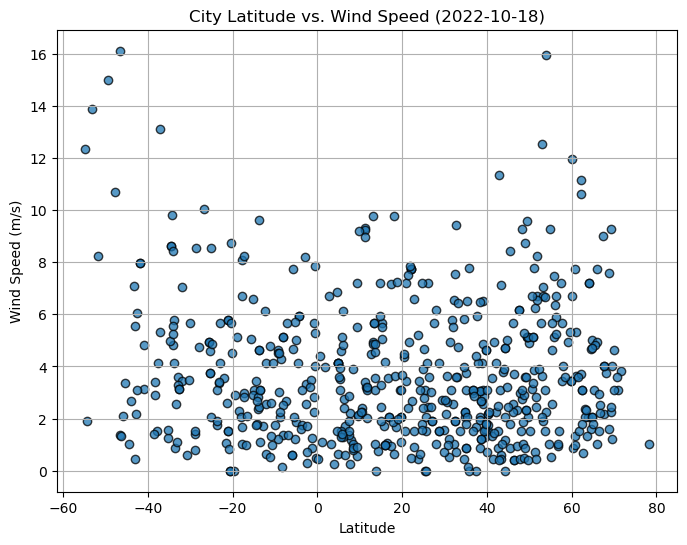

In [10]:
# Build scatter plot for latitude vs. wind speed
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship

In [11]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, x_label, y_label, title, output_file):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line
    regress_values = x_values * slope + intercept
    
    # Create the linear regression equation as a string
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create the scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the linear equation on the plot
    plt.annotate(line_eq, (min(x_values), max(y_values)), fontsize=12, color="red")
    
    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r value is {rvalue}")
    # Show the plot
    plt.show()

In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# Filter data for Northern Hemisphere (latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,wailua homesteads,22.0669,-159.3780,297.59,77,40,7.72,US,1699890579
5,hawaiian paradise park,19.5933,-154.9731,294.28,93,75,3.09,US,1699890580
6,laojunmiao,39.8333,97.7333,274.10,35,3,1.52,CN,1699890580
7,praia da vitoria,38.7333,-27.0667,291.29,94,20,4.12,PT,1699890580
8,santa ana,33.7456,-117.8678,296.47,44,40,1.54,US,1699890415


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# Filter data for Southern Hemisphere (latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ancud,-41.8697,-73.8203,282.51,90,100,7.98,CL,1699890579
1,gueltat zemmour,-41.8697,-73.8203,282.51,90,100,7.98,CL,1699890579
3,natal,-5.7950,-35.2094,304.51,62,40,7.72,BR,1699890579
4,abepura,-2.6333,140.5833,299.60,83,20,2.57,ID,1699890580
9,bredasdorp,-34.5322,20.0403,291.42,63,69,8.63,ZA,1699890580


###  Temperature vs. Latitude Linear Regression Plot

The r value is -0.8629869876499409


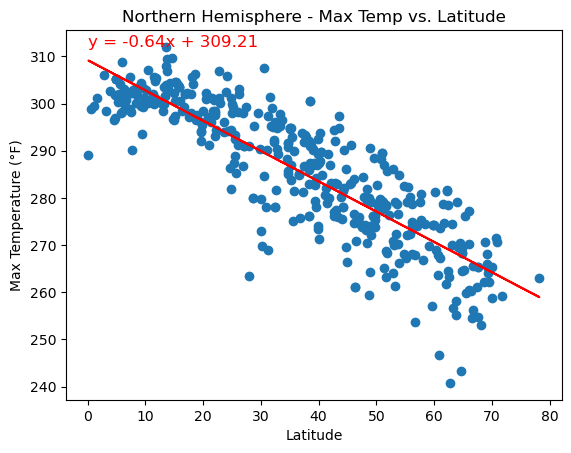

In [14]:
# Perform linear regression on Northern Hemisphere data (latitude vs. temperature)
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temperature (°F)", "Northern Hemisphere - Max Temp vs. Latitude", "output_data/NH_MaxTemp_vs_Latitude.png")

The r value is 0.6854911184363092


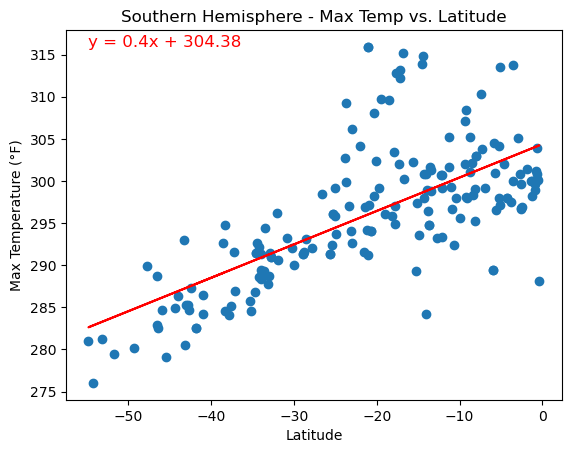

In [15]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (°F)", "Southern Hemisphere - Max Temp vs. Latitude", "output_data/SH_MaxTemp_vs_Latitude.png")

**Northern Hemisphere:**
In the Northern Hemisphere, there is a strong negative linear relationship between the variables, suggesting that an increase in x is associated with a significant decrease in y.

**Southern Hemisphere:**
In the Southern Hemisphere, there is a moderate positive linear relationship, indicating that as x increases,y tends to increase, but the relationship is not as strong as in the Northern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r value is 0.3006359406279334


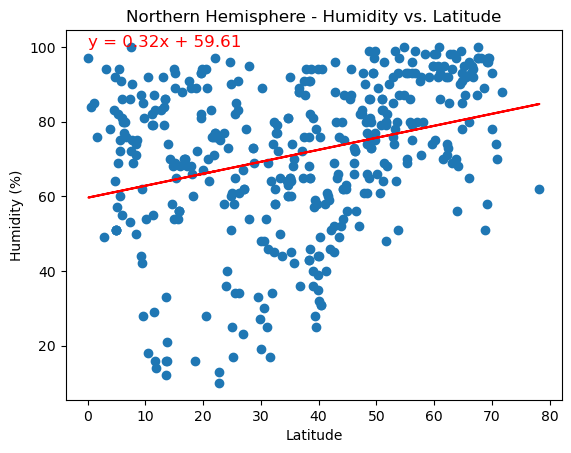

In [16]:
# Perform linear regression on Northern Hemisphere data (latitude vs. humidity)
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Northern Hemisphere - Humidity vs. Latitude", "output_data/NH_Humidity_vs_Latitude.png")

The r value is -0.02440584172383247


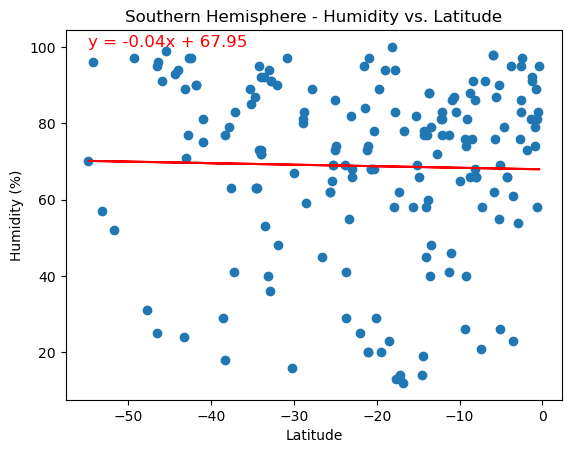

In [17]:
# Perform linear regression on Southern Hemisphere data (latitude vs. humidity)
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Southern Hemisphere - Humidity vs. Latitude", "output_data/SH_Humidity_vs_Latitude.png")

**Northern Hemisphere:**
In the Northern Hemisphere, there is a weak positive linear relationship between the variables, indicating that as 
x increases, y tends to decrease slightly.

**Southern Hemisphere:**
In the Southern Hemisphere, there is an extremely weak positive linear relationship, suggesting that as x increases, y tends to increase very slightly. However, this relationship is almost negligible based on the low correlation coefficient.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is 0.12895983943194755


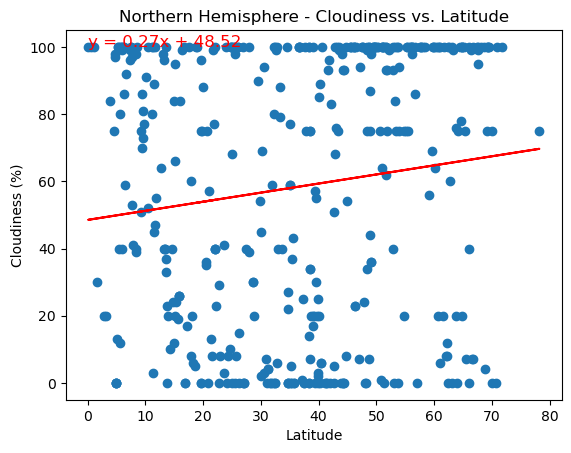

In [18]:
# Perform linear regression on Northern Hemisphere data (latitude vs. cloudiness)
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Northern Hemisphere - Cloudiness vs. Latitude", "output_data/NH_Cloudiness_vs_Latitude.png")

The r value is -0.10176505165388086


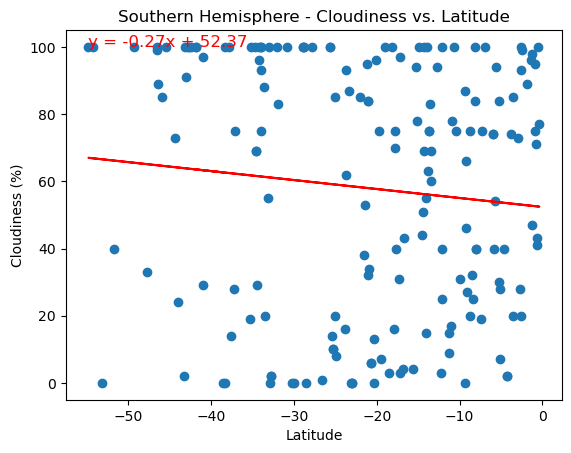

In [19]:
# Perform linear regression on Southern Hemisphere data (latitude vs. cloudiness)
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Southern Hemisphere - Cloudiness vs. Latitude", "output_data/SH_Cloudiness_vs_Latitude.png")

In both the Northern and Southern Hemispheres, there are very weak positive linear relationships between the variables. These relationships suggest that changes in x are associated with small changes in y, and the relationships are not strongly indicative of any significant patterns or trends.
The low correlation coefficients indicate that the linear relationships between the variables are very weak, and other factors not considered in these equations may have a stronger influence on y.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is 0.10549252456656362


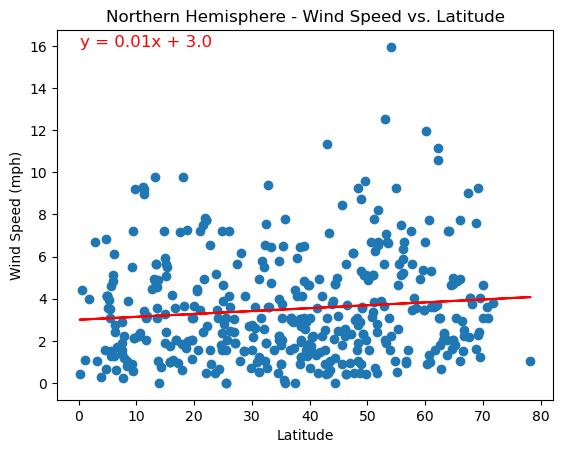

In [20]:
# Perform linear regression on Northern Hemisphere data (latitude vs. wind speed)
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (mph)", "Northern Hemisphere - Wind Speed vs. Latitude", "output_data/NH_WindSpeed_vs_Latitude.png")

The r value is -0.3191137024859562


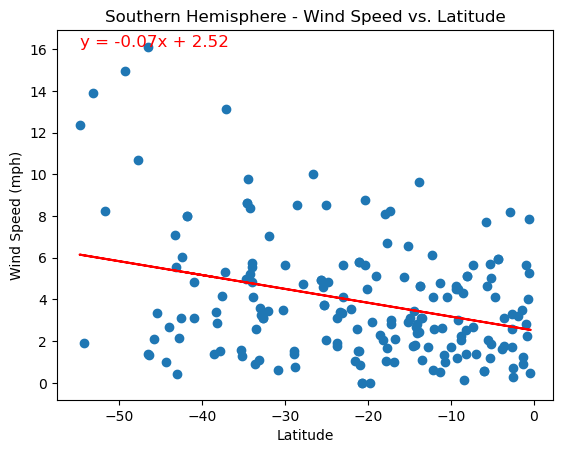

In [21]:
# Perform linear regression on Southern Hemisphere data (latitude vs. wind speed)
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (mph)", "Southern Hemisphere - Wind Speed vs. Latitude", "output_data/SH_WindSpeed_vs_Latitude.png")

In the Northern Hemisphere, there is an extremely weak positive linear relationship between the variables, and any changes in 
x are associated with very minimal changes in y.
In the Southern Hemisphere, there is a weak negative linear relationship, suggesting that as x increases, y tends to decrease slightly. However, the relationship is not strong, and the magnitude of change is relatively small.
These relationships indicate that the variables are not strongly correlated in either hemisphere.

# 